In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

path="/content/drive/MyDrive/Excel-and-CSV-files/titanic.csv"
df= pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Cabin"].fillna("Unknown", inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [28]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


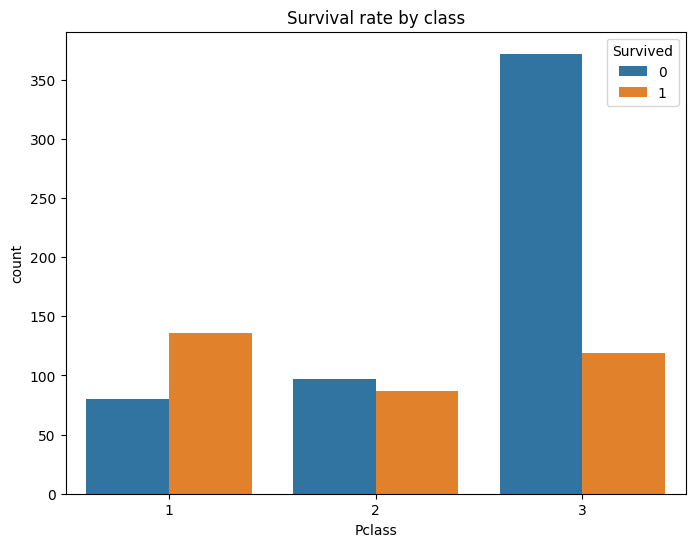

In [29]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival rate by class')
plt.show()

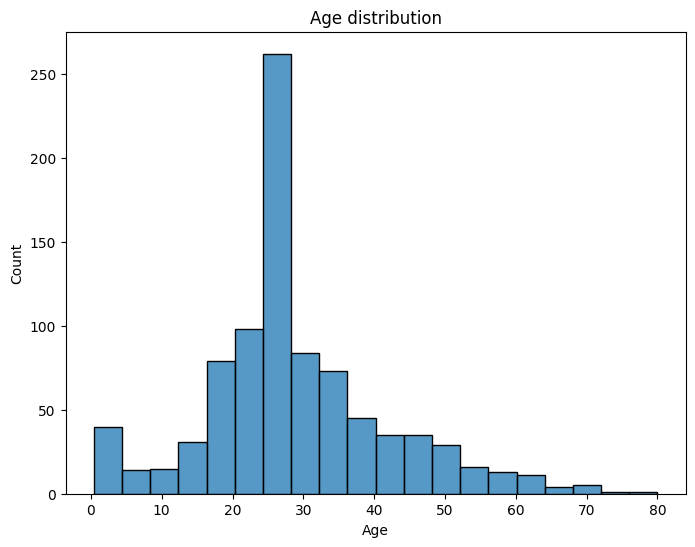

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Age distribution')
plt.show()

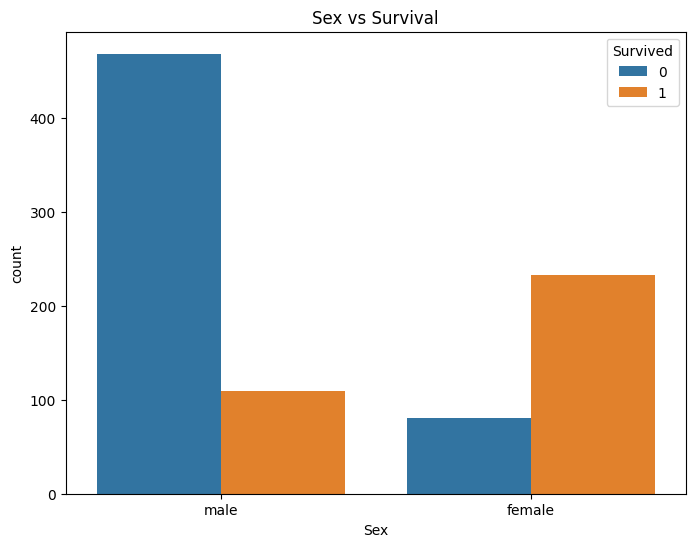

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survival')
plt.show()

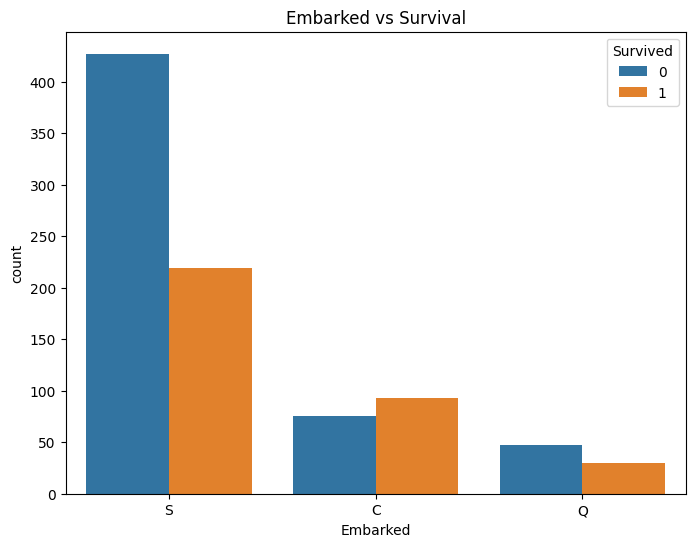

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked vs Survival')
plt.show()

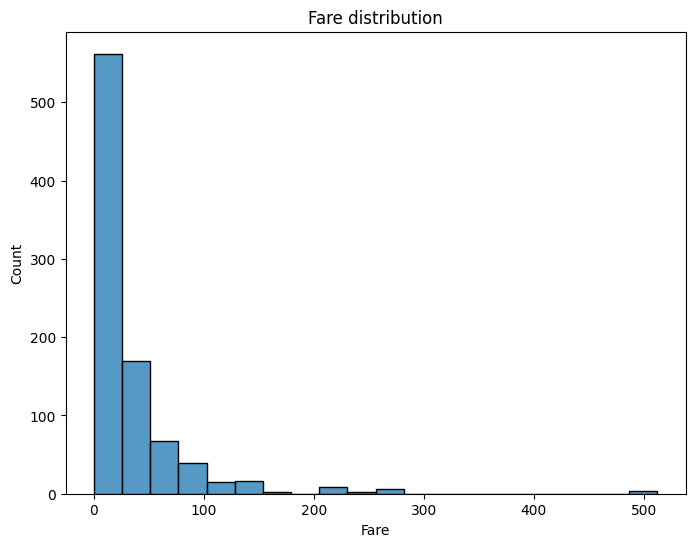

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=20)
plt.title('Fare distribution')
plt.show()

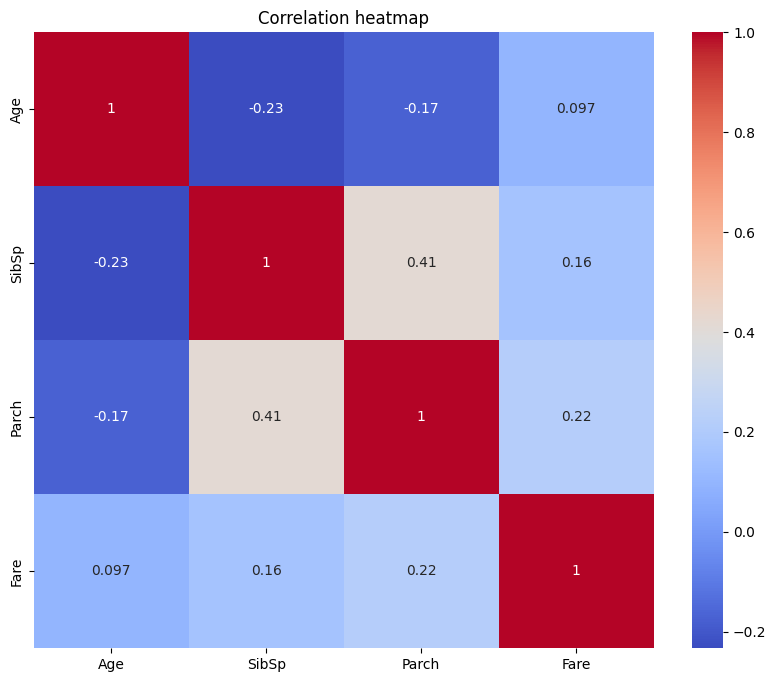

In [34]:

numerical_cols = ['Age','SibSp','Parch','Fare']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
df.select_dtypes(include=['number'])
plt.show()

In [35]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convert 'Sex' to a numerical feature

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Create a new feature 'AgeGroup' by binning 'Age'

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [36]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Create a new feature 'AgeGroup' by binning 'Age'
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Use LabelEncoder to convert 'AgeGroup' to numerical values
le = LabelEncoder()
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

# Select relevant features for training
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:

from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model on the testing data

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:")

print(classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



**MODEL TUNING**

In [ ]:

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid

param_grid = {

    'n_estimators': [100, 200, 300],

    'max_depth': [None, 5, 10],

    'min_samples_split': [2, 5, 10]

}

# Initialize Random Forest Classifier

rf = RandomForestClassifier()

# Perform grid search

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

# Print best hyperparameters and score

print("Best hyperparameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

**MODEL DEPLOYMENT**

In [ ]:

#save model

import joblib
joblib.dump(model, "titanic_model.pkl")

In [ ]:

from flask import Flask, request, jsonify

# Load trained model

model = joblib.load('titanic_model.pkl')

# Create Flask app

app = Flask(__name__)

# Define prediction endpoint

@app.route('/predict', methods=['POST'])

def predict():

    data = request.get_json()

    prediction = model.predict(data)

    return jsonify({'survival': prediction.tolist()})

# Run Flask app

if __name__ == '__main__':

    app.run(debug=True)

In [ ]:
model.score(X_test,y_test)